In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('heart_disease_data.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,thalach,oldpeak,slope,ca,thal,...,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,M,1,145,233,150,2.3,3,0.0,6.0,...,normal,high,16.1,2.3,13.8,-2.532099,14679,2419.4,9135,13.6
1,67,M,4,160,286,108,1.5,2,3.0,3.0,...,high,high,20.8,6.0,18.0,1.167901,19162,2242.3,10720,13.1
2,67,M,4,120,229,129,2.6,2,2.0,7.0,...,normal,low,16.5,10.4,72.8,5.567901,15343,2134.0,8040,13.1
3,37,M,3,130,250,187,3.5,3,0.0,3.0,...,high,normal,10.6,10.5,31.5,8.178571,9250,1972.9,4810,21.6
4,41,F,2,130,204,172,1.4,1,0.0,3.0,...,normal,normal,9.7,2.8,8.4,0.783333,8364,1662.2,5330,19.1


In [21]:
null_count = df.isnull().sum()
null_count 

age                      0
sex                      0
cp                       0
trestbps                 0
chol                     0
thalach                  0
oldpeak                  0
slope                    0
ca                       4
thal                     2
num                      0
age_group                1
cholesterol_level        1
bp_level                 0
risk_score               0
symptom_severity         0
risk_factor              2
symptom_severity_diff    1
age_chol_effect          0
thalach_risk_effect      0
age_trestbps_effect      0
chol_risk_ratio          0
bp_level_encoded         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int64  
 1   sex                    303 non-null    object 
 2   cp                     303 non-null    int64  
 3   trestbps               303 non-null    int64  
 4   chol                   303 non-null    int64  
 5   thalach                303 non-null    int64  
 6   oldpeak                303 non-null    float64
 7   slope                  303 non-null    int64  
 8   ca                     299 non-null    float64
 9   thal                   301 non-null    float64
 10  num                    303 non-null    int64  
 11  age_group              302 non-null    object 
 12  cholesterol_level      302 non-null    object 
 13  bp_level               301 non-null    object 
 14  risk_score             303 non-null    float64
 15  sympto

In [5]:
df.describe()

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca,thal,num,risk_score,symptom_severity,risk_factor,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000,303.000000,301.000000,3.020000e+02,303.000000,303.000000,303.000000,303.000000
mean,54.438944,3.158416,131.689769,246.640264,149.531353,1.039604,1.600660,0.672241,4.734219,0.937294,14.843564,3.508251,19.733887,6.622682e-12,13527.174917,2201.934323,7214.231023,15.906601
std,9.038662,0.960126,17.599748,51.768390,22.835247,1.161075,0.616226,0.937438,1.939706,1.228536,4.067756,4.381467,28.421998,4.258806e+00,4027.315929,648.586510,1742.066108,2.396843
min,29.000000,1.000000,94.000000,126.000000,71.000000,0.000000,1.000000,0.000000,3.000000,0.000000,7.200000,0.000000,0.000000,-4.832099e+00,5916.000000,886.900000,3666.000000,11.300000
25%,48.000000,3.000000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,3.000000,0.000000,12.100000,0.000000,0.000000,-2.982674e+00,10670.000000,1786.300000,5880.000000,14.100000
50%,56.000000,3.000000,130.000000,241.000000,152.000000,0.800000,2.000000,0.000000,3.000000,0.000000,14.400000,1.800000,7.200000,-1.783249e+00,13053.000000,2150.000000,7140.000000,15.400000
75%,61.000000,4.000000,140.000000,275.000000,165.500000,1.600000,2.000000,1.000000,7.000000,2.000000,17.200000,5.500000,28.800000,1.179475e+00,15854.000000,2519.850000,8387.500000,17.450000
max,77.000000,4.000000,200.000000,564.000000,202.000000,6.200000,3.000000,3.000000,7.000000,4.000000,38.900000,24.800000,173.600000,1.996790e+01,37788.000000,6230.100000,12240.000000,24.800000


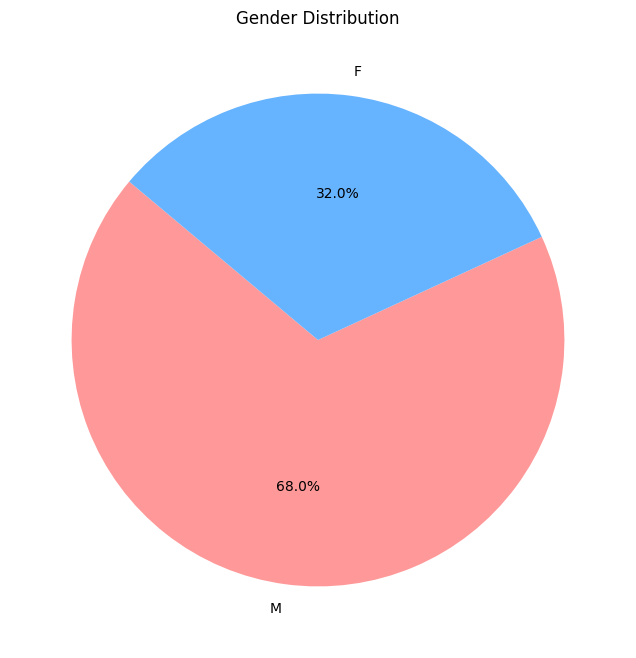

In [31]:
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

In [18]:
df.groupby('sex')['thalach'].mean()

sex
F    151.226804
M    148.733010
Name: thalach, dtype: float64

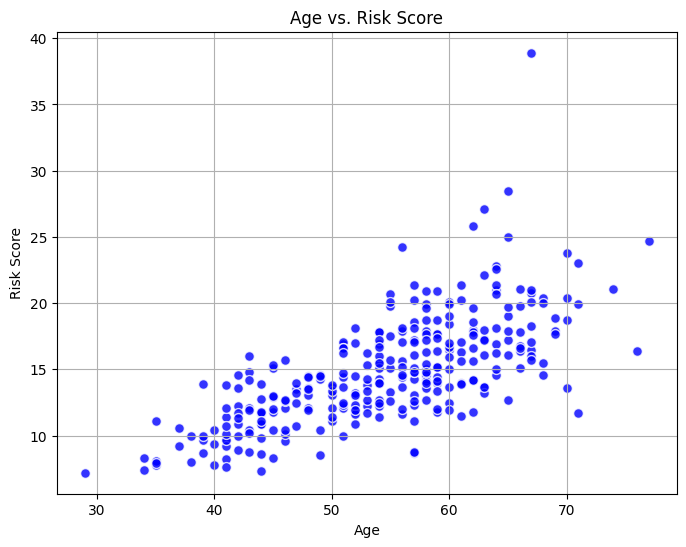

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['risk_score'], color='blue', alpha=0.8, edgecolors='w', s=50)
plt.title('Age vs. Risk Score')
plt.xlabel('Age')
plt.ylabel('Risk Score')
plt.grid(True)
plt.show()


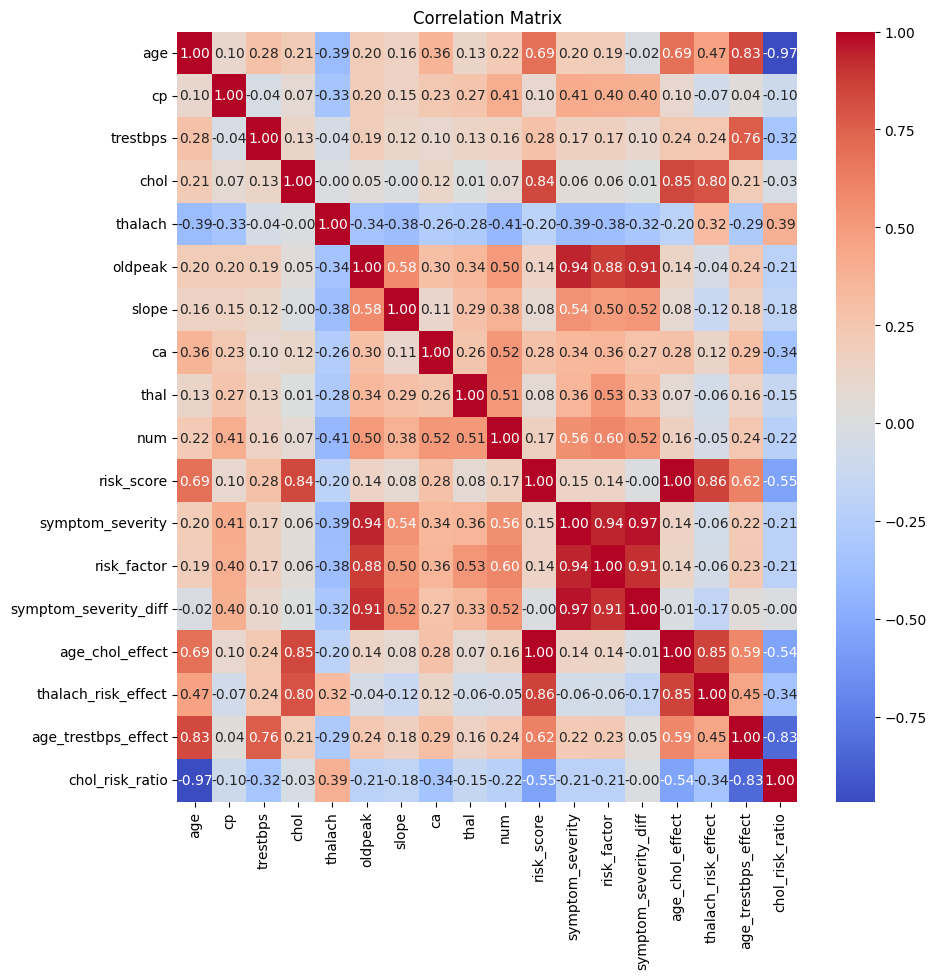

In [18]:
ndf = df.select_dtypes(include=[float, int])
correlation_matrix = ndf.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [57]:
round(df.groupby('bp_level')['risk_score'].mean(),1)

bp_level
high      16.5
low       13.7
normal    14.9
Name: risk_score, dtype: float64

In [38]:
df.head()

,age,sex,cp,trestbps,chol,thalach,oldpeak,slope,ca,thal,...,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,M,1,145,233,150,2.3,3,0.0,6.0,...,normal,high,16.1,2.3,13.8,-2.532099,14679,2419.4,9135,13.6
1,67,M,4,160,286,108,1.5,2,3.0,3.0,...,high,high,20.8,6.0,18.0,1.167901,19162,2242.3,10720,13.1
2,67,M,4,120,229,129,2.6,2,2.0,7.0,...,normal,low,16.5,10.4,72.8,5.567901,15343,2134.0,8040,13.1
3,37,M,3,130,250,187,3.5,3,0.0,3.0,...,high,normal,10.6,10.5,31.5,8.178571,9250,1972.9,4810,21.6
4,41,F,2,130,204,172,1.4,1,0.0,3.0,...,normal,normal,9.7,2.8,8.4,0.783333,8364,1662.2,5330,19.1


Mean Squared Error: 8.60162747164625
R^2 Score: 0.4784372989995669


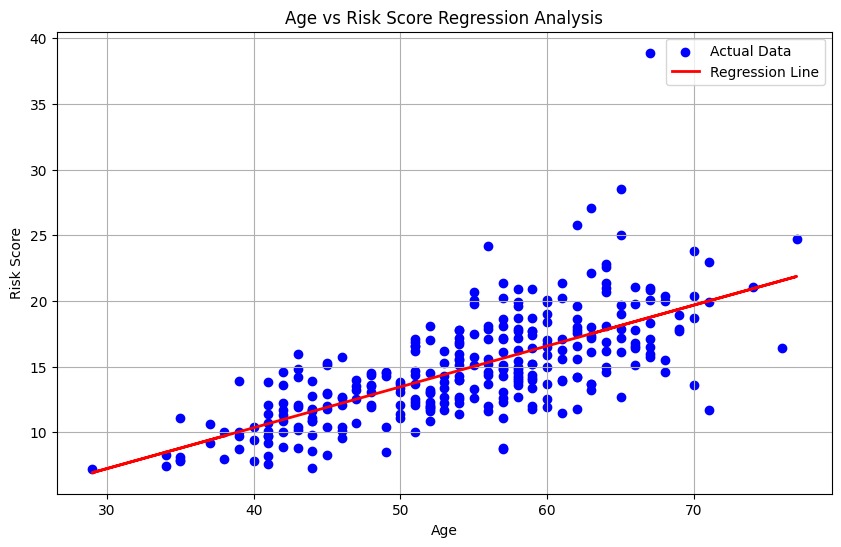

In [44]:
# Prepare the data
X = df['age'].values.reshape(-1, 1)  # Predictor
y = df['risk_score'].values  # Response

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['risk_score'], color='blue', label='Actual Data')
plt.plot(df['age'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Age vs Risk Score Regression Analysis')
plt.xlabel('Age')
plt.ylabel('Risk Score')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
age_to_predict = np.array([[66]])
predicted_risk_score = model.predict(age_to_predict)[0]
print(f'Predicted risk score for 66 year old is : {round(predicted_risk_score,1)}')

Predicted risk score for 66 year old is : 18.4


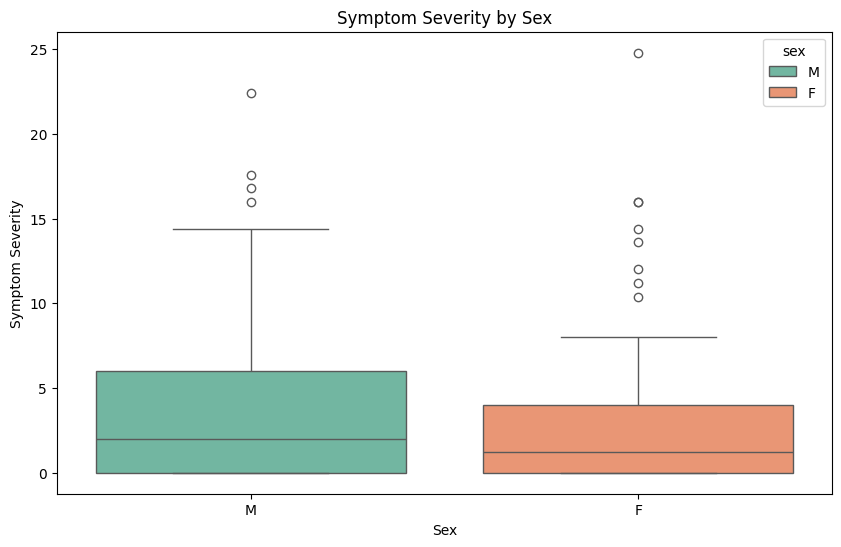

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='symptom_severity',hue='sex', data=df,palette='Set2',legend=True)
plt.title('Symptom Severity by Sex')
plt.xlabel('Sex')
plt.ylabel('Symptom Severity')
plt.show()

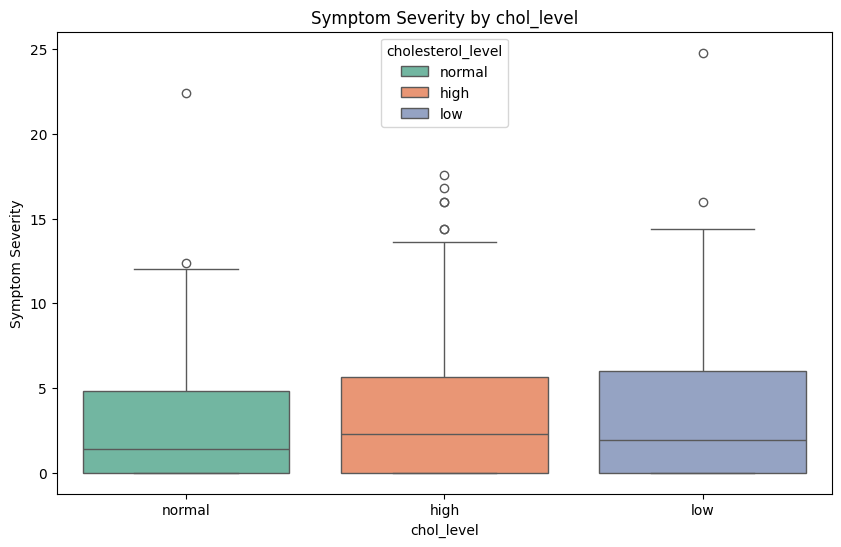

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cholesterol_level', y='symptom_severity',hue='cholesterol_level', data=df,palette='Set2',legend=True)
plt.title('Symptom Severity by chol_level')
plt.xlabel('chol_level')
plt.ylabel('Symptom Severity')
plt.show()

In [72]:
# Prepare the data
X = df[['age','chol']]
y = df['risk_score']

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

new_data = pd.DataFrame({
    'age': [24],
    'chol': [200]
})

# Predict the risk score
predicted_risk_score = model.predict(new_data)[0]

print(f'Predicted risk score for age 66 and cholesterol 275 is: {round(predicted_risk_score,1)}')

Mean Squared Error: 0.23133216188261255
R^2 Score: 0.9859730931643482
Predicted risk score for age 66 and cholesterol 275 is: 4.8


In [ ]:
#logistic regression for age and bp_level

In [6]:
df.head()

,age,sex,cp,trestbps,chol,thalach,oldpeak,slope,ca,thal,...,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,M,1,145,233,150,2.3,3,0.0,6.0,...,normal,high,16.1,2.3,13.8,-2.532099,14679,2419.4,9135,13.6
1,67,M,4,160,286,108,1.5,2,3.0,3.0,...,high,high,20.8,6.0,18.0,1.167901,19162,2242.3,10720,13.1
2,67,M,4,120,229,129,2.6,2,2.0,7.0,...,normal,low,16.5,10.4,72.8,5.567901,15343,2134.0,8040,13.1
3,37,M,3,130,250,187,3.5,3,0.0,3.0,...,high,normal,10.6,10.5,31.5,8.178571,9250,1972.9,4810,21.6
4,41,F,2,130,204,172,1.4,1,0.0,3.0,...,normal,normal,9.7,2.8,8.4,0.783333,8364,1662.2,5330,19.1


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [17]:
df['bp_level'] = df['bp_level'].fillna('Unknown')
label_encoder = LabelEncoder()
df['bp_level_encoded'] = label_encoder.fit_transform(df['bp_level'])
X = df[['age']]
y = df['bp_level_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
age_to_predict = pd.DataFrame({'age' : [45]})
predicted_encoded_bp_level = model.predict(age_to_predict)
predicted_bp_level = label_encoder.inverse_transform(predicted_encoded_bp_level)[0]
accuracy = accuracy_score(y_test,y_pred)
print(f'predicted bp_level for {age_to_predict.iloc[0,0]} years old is: {predicted_bp_level}')
print(f'Accuracy of model is: {round(accuracy,3)}')

predicted bp_level for 45 years old is: normal
Accuracy of model is: 0.549
